## Appendix 1 - Python Code and Outputs

### Data Preparation

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Training Data

In [23]:
import numpy as np
import pandas as pd
# load training data
digit_training_data = pd.read_csv('train.csv')

# show first rows of the data
digit_training_data.head(100)
# show number of columns and rows
digit_training_data.shape

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

### Investigation of Missing Data and Outliers in Training Data

In [24]:
# find null counts, percentage of null values, and column type
null_count = digit_training_data.isnull().sum()
null_percentage = digit_training_data.isnull().sum() * 100 / len(digit_training_data)
column_type = digit_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


The above analysis displays that there is no missing data in the digit recognizer training dataset.

### Import Testing Data

In [25]:
# import test dataset
digit_testing_data = pd.read_csv('test.csv')

# show first ten rows of the data
digit_testing_data.head(10)
# show number of columns and rows
digit_testing_data.shape

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(28000, 784)

### Investigation of Missing Data and Outliers in Training Data

In [26]:
# find null counts, percentage of null values, and column type
null_count = digit_testing_data.isnull().sum()
null_percentage = digit_testing_data.isnull().sum() * 100 / len(digit_training_data)
column_type = digit_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


The above analysis displays that there is no missing data in the digit recognizer test dataset.

### Apply Principal Components Analysis (PCA) to Combined Training and Test Data

First, we will combine the training and test dataframes

In [27]:
# Create a copy of the training dataframe
pca_train_df = digit_training_data.copy(deep=True)

# Drop the label column from the copy of the training dataframe
pca_train_df.drop(['label'], axis=1, inplace=True)

# Concatenate the training and test dataframes
pca_df = pd.concat([pca_train_df, digit_testing_data])

# show first rows of the data
pca_df.head(10)
# show number of columns and rows
pca_df.shape
# Describe the dataframe
pca_df.describe()


# find null counts, percentage of null values, and column type
null_count = pca_df.isnull().sum()
null_percentage = pca_df.isnull().sum() * 100 / len(digit_training_data)
column_type = pca_df.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(70000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


,Missing Count,Percentage Missing,Column Type


Next, we scale the data to prepare it for our principal components analysis

In [28]:
# Scale PCA dataframe's data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pca_scaled = sc.fit_transform(pca_df) # normalizing the features

# Convert scaled data from numpy array into dataframe
pca_features = list(pca_df.columns.values)
pca_scaled_df = pd.DataFrame(pca_scaled, columns=pca_features)

# Confirm scaling transformation was a success
pca_scaled_df.shape
pca_scaled_df.head(10)
pca_scaled_df.describe()


(70000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.823623e-15,-1.137216e-15,2.825315e-15,-3.964385e-16,1.831964e-15,1.212366e-15,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.236282e+01,5.965323e+01,9.086908e+01,1.619808e+02,1.634635e+02,1.932091e+02,0.0,0.0,0.0,0.0


We also apply this scaling to our test dataframe for later use as we progress through the construction of our Principal Component Analysis and Random Forest model creation processes.

In [29]:
# Apply the standard scaling to the test dataframe
pca_test_scaled = sc.transform(digit_testing_data)

# Convert scaled data from numpy array into dataframe
pca_test_features = list(digit_testing_data.columns.values)
pca_test_scaled_df = pd.DataFrame(pca_test_scaled, columns=pca_test_features)

# Confirm scaling transformation was a success
pca_test_scaled_df.shape
pca_test_scaled_df.head(10)
pca_test_scaled_df.describe()


(28000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,2.800000e+04,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.005476,-0.006186,-0.006679,-0.003435,-0.004133,-5.342334e-03,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.913561,0.849760,0.651505,0.771675,0.519683,5.143547e-16,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.016750,-0.010638,-0.008339,-5.342334e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.016750,-0.010638,-0.008339,-5.342334e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.016750,-0.010638,-0.008339,-5.342334e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.016750,-0.010638,-0.008339,-5.342334e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.195907,59.653231,69.315126,119.722186,76.578856,-5.342334e-03,0.0,0.0,0.0,0.0


Next, we will conduct a Principal Components Analysis to identify principal components that account for at least 95% of the variation in the data.

Text(0.5, 1.0, 'Cumulative Scree Plot')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Cumulative Variance Explained')

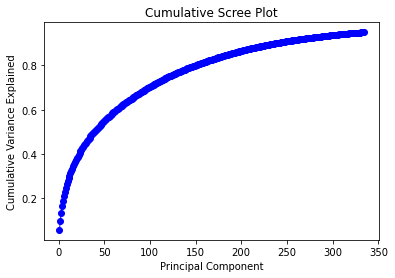

,Principal Component,Variance Explained
0,1,0.056427
1,2,0.096839
2,3,0.134222
3,4,0.163152
4,5,0.188360
...,...,...
329,330,0.948808
330,331,0.949146
331,332,0.949481
332,333,0.949815


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_325,PC_326,PC_327,PC_328,PC_329,PC_330,PC_331,PC_332,PC_333,PC_334
0,-5.230192,-4.904646,4.175498,-0.753746,4.991252,1.873491,4.739370,-4.818814,0.209226,-1.457392,...,-0.237811,-0.032720,-0.347989,-0.033718,-0.032340,-0.086677,0.286938,0.238340,0.308111,0.212496
1,19.376064,5.924937,1.124527,-2.236678,3.154725,-1.899992,-3.861523,0.291863,-4.064207,-4.372353,...,-0.076353,-0.411639,0.127161,0.209917,-0.008626,0.390598,-0.195692,0.269743,-1.024385,0.794415
2,-7.675868,-1.518335,2.369636,2.392773,4.809067,-4.330499,-0.993471,1.809950,0.311141,0.019186,...,0.073145,0.000078,-0.083248,0.118683,-0.174749,-0.240827,-0.081235,0.161169,0.042494,0.192055
3,-0.360917,5.988875,1.676212,4.312827,2.388172,2.129843,4.456385,-0.344041,0.783532,5.446841,...,0.238770,0.937221,1.120829,0.095785,-1.380635,-1.612834,0.745069,1.671081,0.519739,-0.532085
4,26.628547,5.805648,0.833779,-2.676026,9.565533,-2.676312,-6.303765,-1.579776,-4.078544,-5.843392,...,0.536218,0.294681,0.369603,-0.305649,1.135710,0.219902,-0.481013,-0.476704,-0.034039,0.866713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-1.099783,8.956724,-2.928516,-0.816439,-5.882169,-0.554970,2.339101,-4.793652,-2.050955,0.071534,...,0.046077,-0.006018,0.160415,-0.331469,0.115274,-0.163143,0.024365,0.001086,0.074090,0.114496
69996,-3.590883,9.075696,-5.882224,0.284067,2.110737,-3.145613,7.328235,3.542144,-3.870924,-1.293863,...,-0.482811,-0.067257,0.723103,-0.749342,0.342094,0.342097,0.036666,0.221084,-0.261224,-0.042281
69997,-2.978092,1.570972,5.616925,-9.443330,-0.177769,-2.517486,-1.220313,0.480684,-2.481774,1.325569,...,-0.082140,-0.131117,-0.039130,0.090952,-0.106315,0.184498,0.298433,-0.398272,0.591019,-0.191646
69998,-3.978432,2.909071,-3.836933,-1.475158,-6.942173,-2.689870,1.417715,-0.608694,2.042616,-0.161260,...,0.318388,0.148574,-0.020985,-0.331211,0.149063,0.351817,-0.273346,-0.380827,-0.272305,-0.076076


The total run time for the Principal Components Analysis was 0:00:10.853180.


In [30]:
# Start a timer for the Principal Components Analysis
import datetime
pca_start = datetime.datetime.now()


# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA
pca_digits_train_test = PCA(n_components=334)
principal_components_digits = pca_digits_train_test.fit_transform(pca_scaled_df)




# Create a Cumulative Scree plot to help us determine how many principal components to include in our random forest model
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca_digits_train_test.n_components_) + 1
cumulative_explained_variance_pca = np.cumsum(pca_digits_train_test.explained_variance_ratio_)

plt.plot(PC_values, cumulative_explained_variance_pca, 'o-', linewidth=1, color='blue')
plt.title('Cumulative Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()

# Create a dataframe to display the information in the cumulative scree plot in a different manner
scree_df = pd.DataFrame({'Principal Component':PC_values, 'Variance Explained':cumulative_explained_variance_pca})
scree_df

# Create a dataframe that contains the principal component values for each of the observations in the pca dataframe
pca_column_list = []
for num in range(1, 335):
    pca_column_list.append("PC_" + str(num))

pca_digits_df = pd.DataFrame(data = principal_components_digits , columns = pca_column_list )

pca_digits_df


# Print the run time for Python to complete the Principal Components Analysis
pca_end = datetime.datetime.now()
pca_runtime = pca_end - pca_start
print(f"The total run time for the Principal Components Analysis was {pca_runtime}.")







### Construct a Random Forest Model Using the Principal Components Identified

Let's fit a Random Forest Model to predict digits using the principal components just identified.  We will use our training and validation datasets to conduct hyperparameter tuning to find the best hyperparameters for random forest modeling.

In [31]:
# Start a timer for the Random Forest

pca_rf_start = datetime.datetime.now()

# Create the Random Forest Model

# Import Required Modules
#pip install graphviz
#import pandas as pd
#import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Split the training dataset into predictor and outcome components
rf_train_validation_x = pca_digits_df.copy(deep=True)
rf_train_validation_x.drop(rf_train_validation_x.tail(28000).index, inplace = True)
rf_train_validation_y = digit_training_data['label']

# Split the Kaggle training data into training and validation components
rf_x_train, rf_x_validation, rf_y_train, rf_y_validation = train_test_split(rf_train_validation_x,
                                                                      rf_train_validation_y, 
                                                                            test_size=0.2, 
                                                                           random_state = 1)

# Conduct hyperparameter tuning for random forest models
param_dist = {'n_estimators': randint(10,100),
              'max_depth': randint(1,100),
             'max_features': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(rf_x_train, rf_y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Print the run time for Python to complete the Random Forest
pca_rf_end = datetime.datetime.now()
pca_rf_runtime = pca_rf_end - pca_rf_start
print(f"The total run time for the Random Forest Model using the principal components was {pca_rf_runtime}.")


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020CA8C54F40>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020CA8868EB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020CE26ACA60>})

Best hyperparameters: {'max_depth': 35, 'max_features': 10, 'n_estimators': 52}
The total run time for the Random Forest Model using the principal components was 0:03:18.044292.


Next, we will assess the strength of the random forest model associated with the optimal hyperparameters by applying the model to the validation dataset and observing the resulting confusion matrix, accuracy, precision, and recall.

Accuracy: 0.9111904761904762


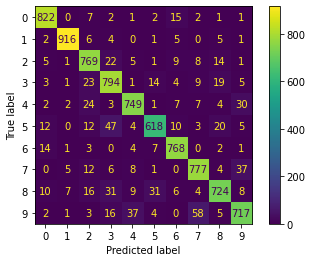

In [35]:

# Generate predictions with the best model
y_validation_predictions_rf = best_rf.predict(rf_x_validation)

# Create the confusion matrix associated with the best random forest model
cm = confusion_matrix(rf_y_validation, y_validation_predictions_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Calculate the accuracy, precision, and recall associated with the predictions of the best random forest model

accuracy_rf_validation = accuracy_score(rf_y_validation, y_validation_predictions_rf)
#precision_rf_validation = precision_score(rf_y_validation, y_validation_predictions_rf)
#recall_rf_validation = recall_score(rf_y_validation, y_validation_predictions_rf)

print("Accuracy:", accuracy_rf_validation)
#print("Precision:", precision_rf_validation)
#print("Recall:", recall_rf_validation)


Apply the Random Forest Model to the Test Dataframe

In [42]:
# Create a dataframe for predictor variables in the test dataframe for random forest model
#rf_testing_x = rf_testing_df.drop(columns=['PassengerId'])
rf_testing_x = pca_digits_df.copy(deep=True)
rf_testing_x.drop(rf_testing_x.head(42000).index, inplace = True)

# Apply the Random Forest model to the test dataset
y_test_predictions_rf = best_rf.predict(rf_testing_x)

# Put the random forest predictions into a Pandas dataframe
prediction_df_rf = pd.DataFrame(y_test_predictions_rf, columns=['Label'])

# Add the ID column to the front of the random forest predictions dataframe
ImageId_series = pd.Series(range(1,28001))
prediction_df_rf.insert(0, 'ImageId', ImageId_series)

#output predictions to csv
prediction_df_rf.to_csv('test_predictions_pca_random_forest_v1.csv', index=False)


Let's display the Kaggle results from the application of the random forest model using principal components to the test dataset

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1502.5, 339.5, -0.5)

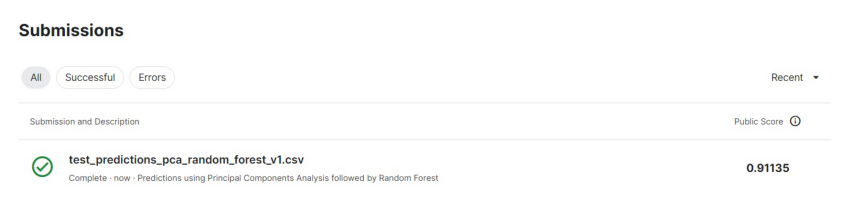

In [43]:
# Display the kaggle results associated with the Random Forest Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Digit_PCA_Random_Forest_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### Construct a Random Forest Model Using the Principal Components Identified and the Original Data

Let's fit a Random Forest Model to predict digits using the principal components and the original underlying data.

In [ ]:
# Start a timer for the Random Forest

pca_rf_v2_start = datetime.datetime.now()








# Print the run time for Python to complete the Random Forest
pca_rf_v2_end = datetime.datetime.now()
pca_rf_v2_runtime = pca_rf_v2_end - pca_rf_v2_start
print(f"The total run time for the Random Forest Model using the principal components was {pca_rf_v2_runtime}.")


Let's display the Kaggle results from the application of the random forest model using principal components and the original underlying data features to the test dataset.

# Display the kaggle results associated with the Random Forest Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Digit_PCA_And_Original_Features_Random_Forest_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()